# Credit Card Fraud Exploratory Data Analysis
## Data Collection and Source
- Dataset loaded from local CSV file `fraudTest.csv` in this project.
- Treat this as a static snapshot; document the original source, license, and collection date for reproducibility.

## Project Goals
- Validate data quality, clean and preprocess fields, explore fraud patterns, and summarize insights.


Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_theme(style="whitegrid") 
sns.set_palette("husl")

Loading Dataset

In [2]:
Credit = pd.read_csv('fraudTest.csv')
print(f"Shape: {Credit.shape}")
print(f"Columns: {Credit.columns.tolist()}")
print()

Shape: (555719, 23)
Columns: ['sn', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']



In [3]:
print("First 5 rows:")
display(Credit.head())

print("\nDataset Info:")
Credit.info()

First 5 rows:


,sn,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   sn                     555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                 

Viewing missing values and Dupics

In [4]:
print("\nMissing Values:")
print(Credit.isnull().sum())

print(f"\nTotal missing values: {Credit.isnull().sum().sum()}")
print(f"Duplicate rows: {Credit.duplicated().sum()}")


Missing Values:
sn                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Total missing values: 0
Duplicate rows: 0


Our Target Value

In [5]:
print("TARGET VARIABLE: is_fraud")

TARGET VARIABLE: is_fraud


Class Distribution

In [6]:
fraud_dist = Credit['is_fraud'].value_counts()
fraud_percentage = Credit['is_fraud'].value_counts(normalize=True) * 100

print("Class Distribution:")
print(f"Non-Fraud (0): {fraud_dist[0]:,} transactions ({fraud_percentage[0]:.2f}%)")
print(f"Fraud (1): {fraud_dist[1]:,} transactions ({fraud_percentage[1]:.2f}%)")

Class Distribution:
Non-Fraud (0): 553,574 transactions (99.61%)
Fraud (1): 2,145 transactions (0.39%)


visualization

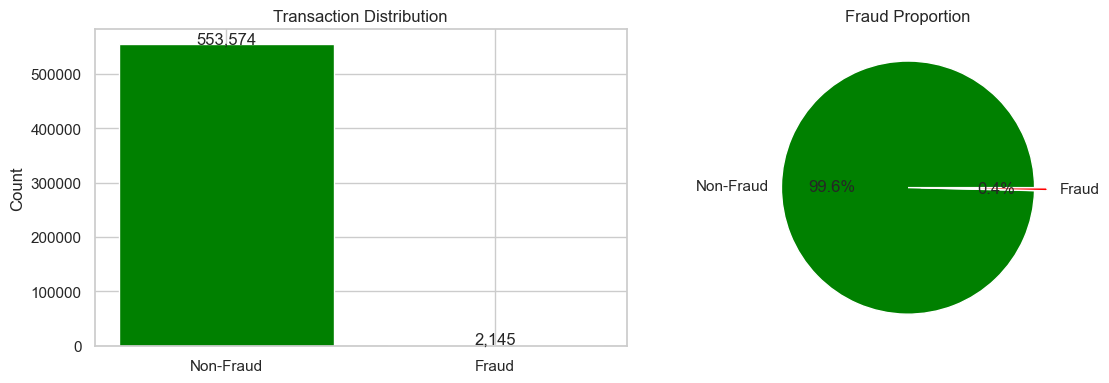

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].bar(['Non-Fraud', 'Fraud'], fraud_dist.values, color=['green', 'red'])
axes[0].set_title('Transaction Distribution')
axes[0].set_ylabel('Count')
for i, v in enumerate(fraud_dist.values):
    axes[0].text(i, v + 1000, f'{v:,}', ha='center')

axes[1].pie(fraud_dist.values, labels=['Non-Fraud', 'Fraud'], 
            autopct='%1.1f%%', colors=['green', 'red'], explode=(0, 0.1))
axes[1].set_title('Fraud Proportion')
plt.tight_layout()
plt.show()

Cleaning and Feature Extrction

In [8]:
# Create a working copy
df = Credit.copy()

columns_to_drop = ['first', 'last', 'dob', 'lat', 'long', 'merch_lat', 
                   'merch_long', 'unix_time', 'street', 'city', 
                   'city_pop', 'zip', 'sn']

print(f"Dropping {len(columns_to_drop)} columns...")
df.drop(columns=columns_to_drop, inplace=True)
print(f"New shape: {df.shape}")
print(f"Remaining columns: {df.columns.tolist()}")

Dropping 13 columns...
New shape: (555719, 10)
Remaining columns: ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'state', 'job', 'trans_num', 'is_fraud']


In [9]:
print("\nProcessing datetime column")
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M')


Processing datetime column


In [10]:
# Extract time-based features
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek  # Monday=0
df['day'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
df['is_night'] = ((df['hour'] >= 22) | (df['hour'] <= 6)).astype(int)

In [11]:
# Drop original datetime
df.drop(columns=['trans_date_trans_time'], inplace=True)
print("Extracted: hour, day_of_week, day, month, is_weekend, is_night")

Extracted: hour, day_of_week, day, month, is_weekend, is_night


In [12]:
# Create new features
print("\nCreating new features")
df['amt_log'] = np.log1p(df['amt'])  # Handle skewed amount data
df['amt_category'] = pd.cut(df['amt'], 
                           bins=[0, 10, 50, 100, 500, 1000, df['amt'].max()],
                           labels=['0-10', '10-50', '50-100', '100-100', '500-1000', '1000+'])


Creating new features


EXPLORATORY DATA ANALYSIS


1. Numerical Features Summary:
                 amt           hour            day
count  555719.000000  555719.000000  555719.000000
mean       69.392810      12.809062      16.463904
std       156.745941       6.810924       8.955311
min         1.000000       0.000000       1.000000
25%         9.630000       7.000000       9.000000
50%        47.290000      14.000000      17.000000
75%        83.010000      19.000000      24.000000
max     22768.110000      23.000000      31.000000


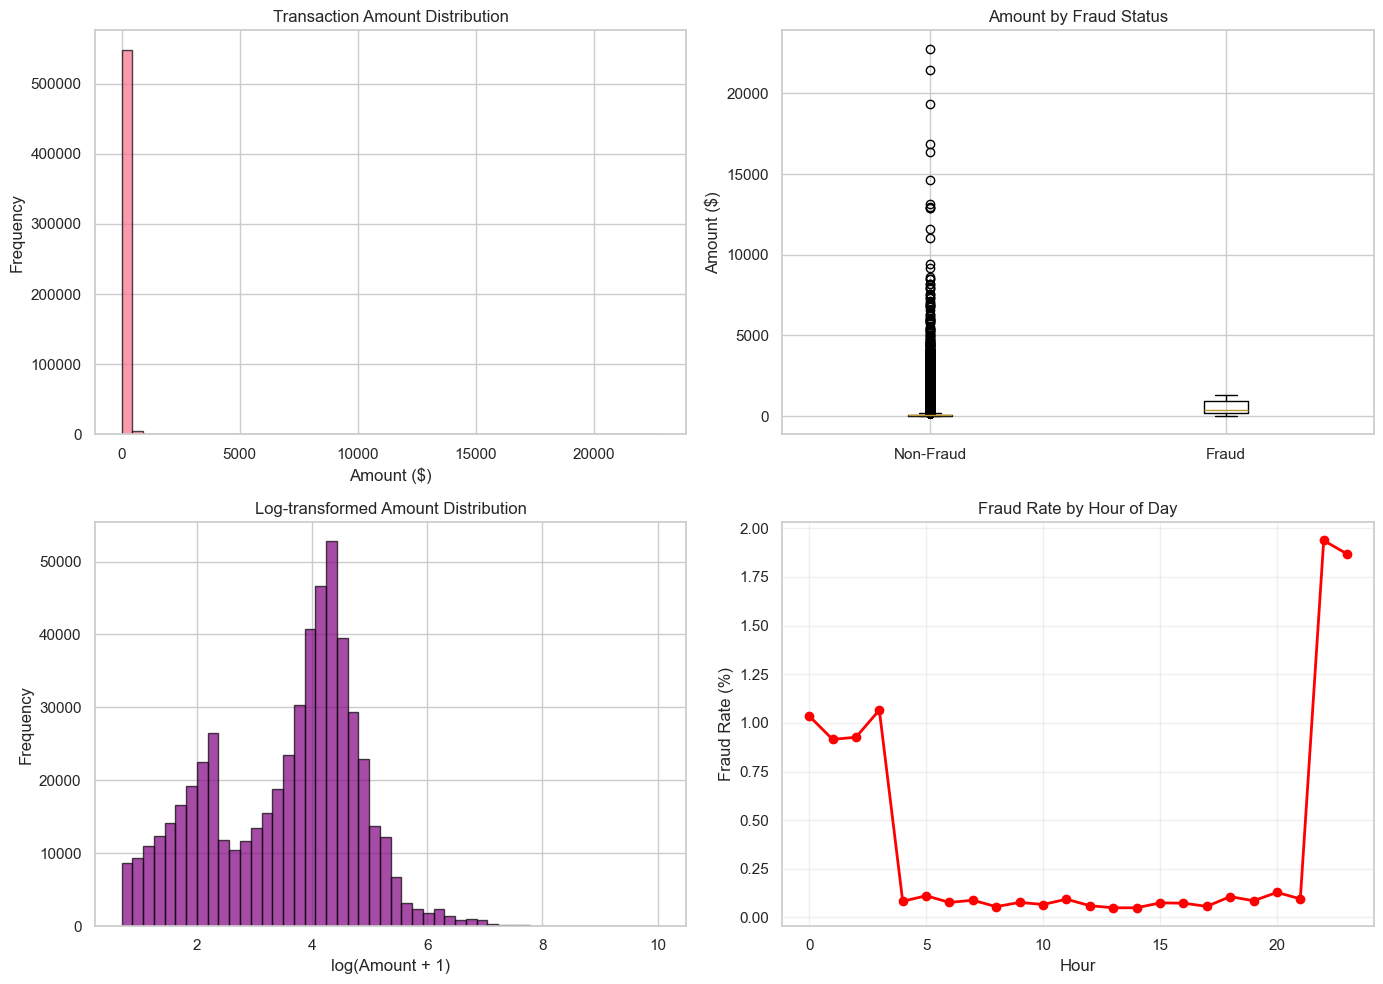

In [13]:
# Numerical Features Analysis
print("\n1. Numerical Features Summary:")
print(df[['amt', 'hour', 'day']].describe())

# Amount distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram of amounts
axes[0, 0].hist(df['amt'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Transaction Amount Distribution')
axes[0, 0].set_xlabel('Amount ($)')
axes[0, 0].set_ylabel('Frequency')

# Boxplot of amounts by fraud status
fraud_0 = df[df['is_fraud'] == 0]['amt']
fraud_1 = df[df['is_fraud'] == 1]['amt']
axes[0, 1].boxplot([fraud_0, fraud_1], labels=['Non-Fraud', 'Fraud'])
axes[0, 1].set_title('Amount by Fraud Status')
axes[0, 1].set_ylabel('Amount ($)')

# Amount distribution (log scale)
axes[1, 0].hist(df['amt_log'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1, 0].set_title('Log-transformed Amount Distribution')
axes[1, 0].set_xlabel('log(Amount + 1)')
axes[1, 0].set_ylabel('Frequency')

# Fraud rate by hour
fraud_by_hour = df.groupby('hour')['is_fraud'].mean() * 100
axes[1, 1].plot(fraud_by_hour.index, fraud_by_hour.values, marker='o', linewidth=2, color='red')
axes[1, 1].set_title('Fraud Rate by Hour of Day')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Fraud Rate (%)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Categorical Features Analysis

In [14]:
# Transaction categories
print("\nTransaction Categories:")
category_counts = df['category'].value_counts()
print(f"Number of unique categories: {df['category'].nunique()}")
print("Top 10 categories:")
print(category_counts.head(10))

# Fraud rate by category
fraud_by_category = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
print("\nTop 5 categories by fraud rate:")
print((fraud_by_category.head() * 100).round(2).astype(str) + '%')


Transaction Categories:
Number of unique categories: 14
Top 10 categories:
category
gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
Name: count, dtype: int64

Top 5 categories by fraud rate:
category
shopping_net     1.21%
misc_net         0.98%
grocery_pos      0.92%
shopping_pos     0.43%
gas_transport    0.27%
Name: is_fraud, dtype: object


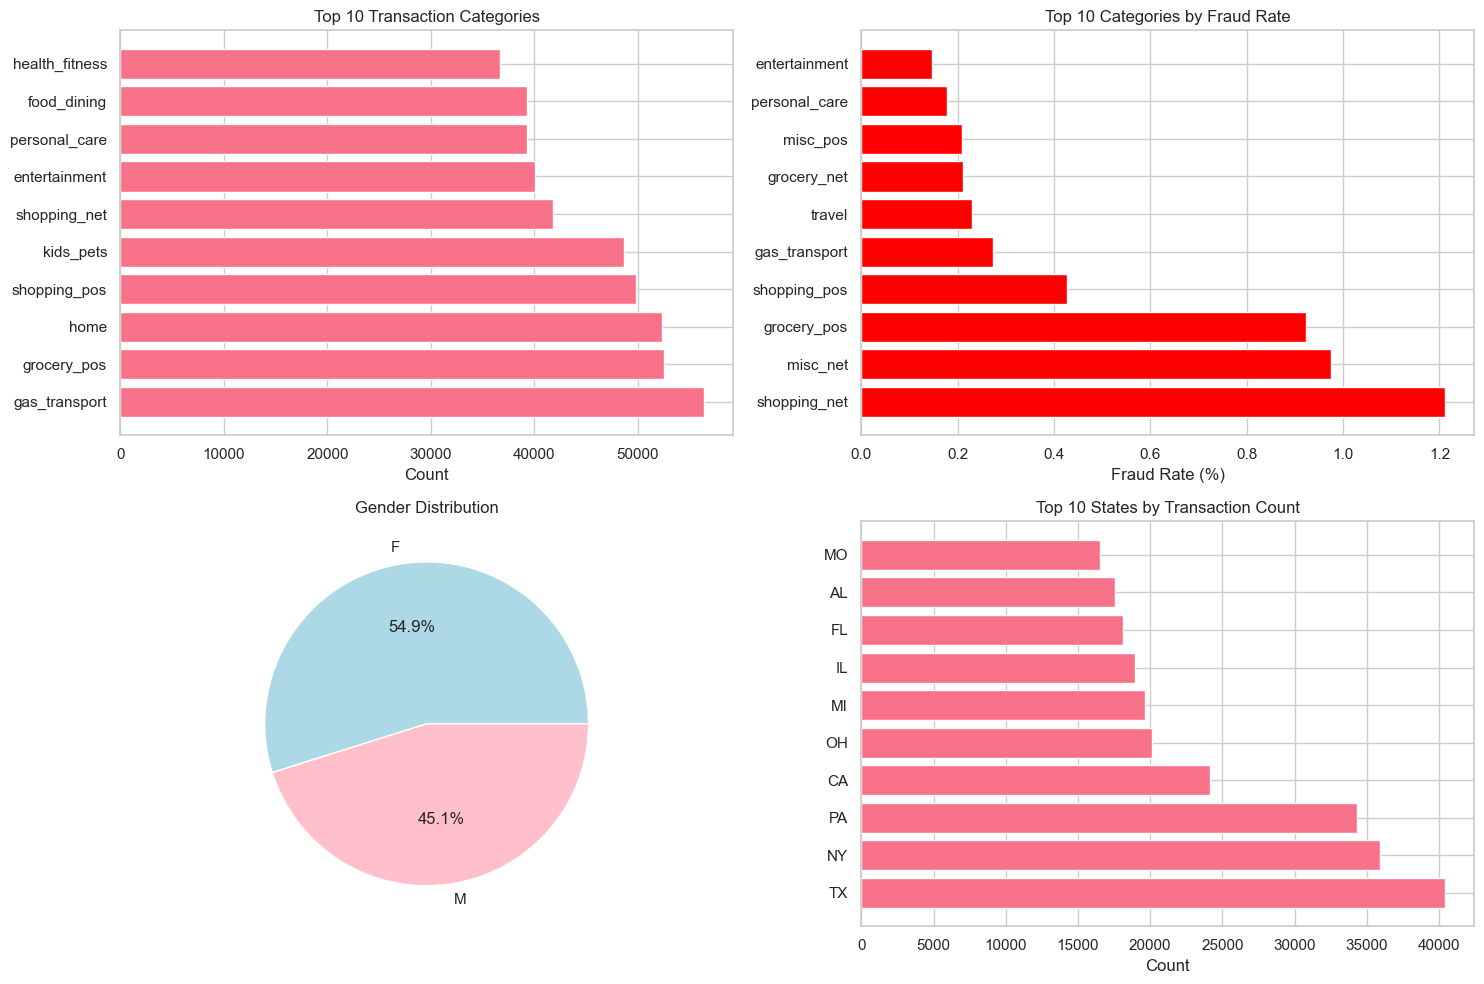

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# Top categories bar plot
top_cats = category_counts.head(10)
axes[0, 0].barh(top_cats.index, top_cats.values)
axes[0, 0].set_title('Top 10 Transaction Categories')
axes[0, 0].set_xlabel('Count')

# Fraud rate by category (top 10)
top_fraud_cats = fraud_by_category.head(10)
axes[0, 1].barh(top_fraud_cats.index, top_fraud_cats.values * 100, color='red')
axes[0, 1].set_title('Top 10 Categories by Fraud Rate')
axes[0, 1].set_xlabel('Fraud Rate (%)')

# Gender distribution
gender_counts = df['gender'].value_counts()
axes[1, 0].pie(gender_counts.values, labels=gender_counts.index, 
               autopct='%1.1f%%', colors=['lightblue', 'pink'])
axes[1, 0].set_title('Gender Distribution')

# State analysis (top 10)
top_states = df['state'].value_counts().head(10)
axes[1, 1].barh(top_states.index, top_states.values)
axes[1, 1].set_title('Top 10 States by Transaction Count')
axes[1, 1].set_xlabel('Count')

plt.tight_layout()
plt.show()

Time-based Analysis

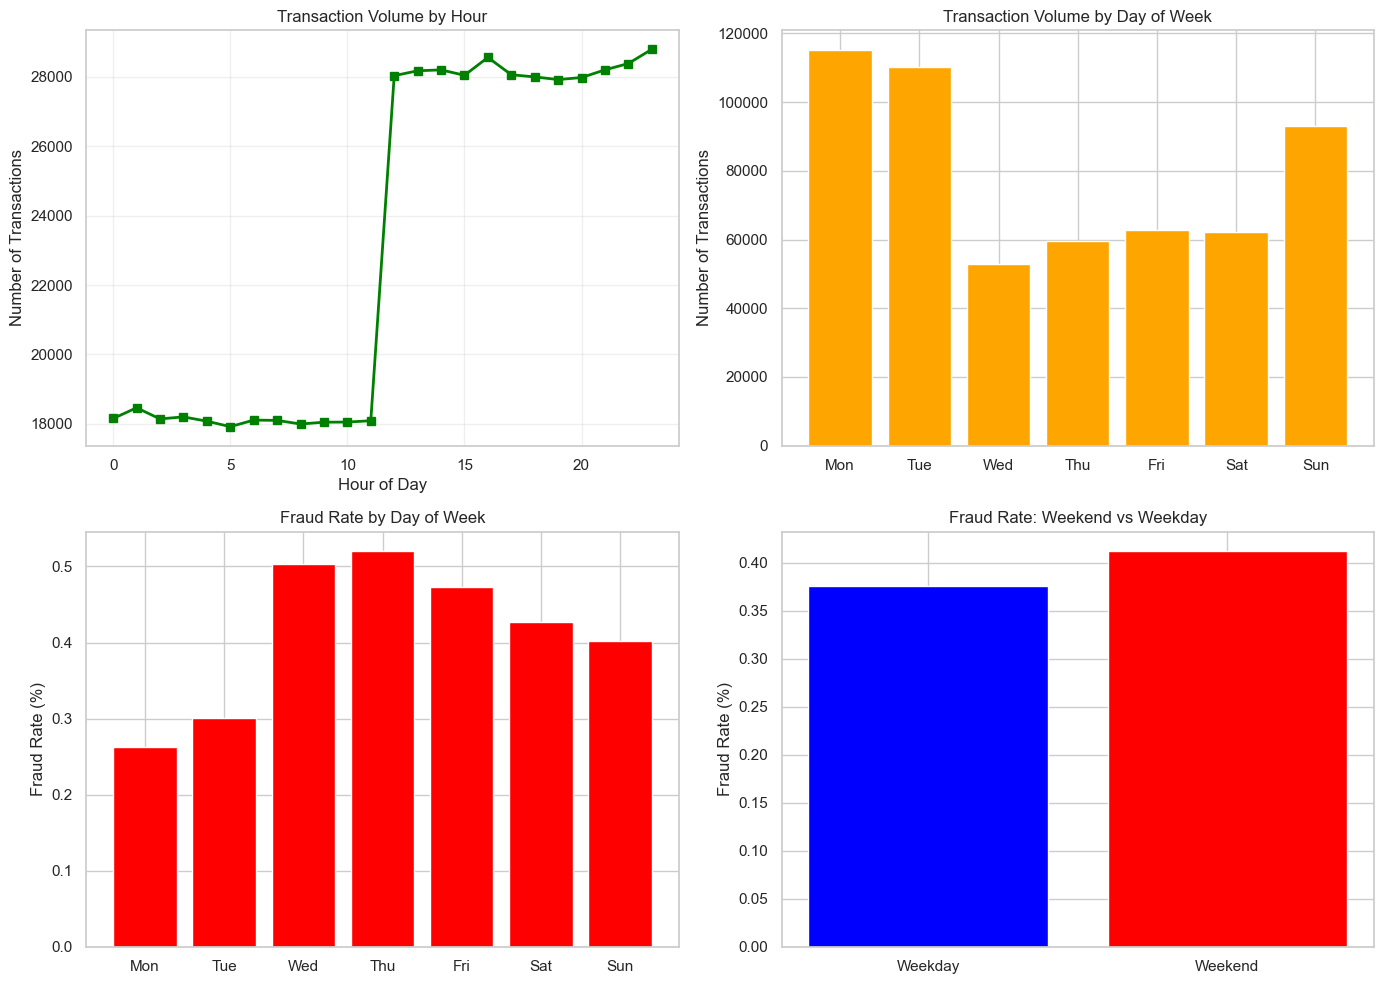

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# Transactions by hour
trans_by_hour = df.groupby('hour').size()
axes[0, 0].plot(trans_by_hour.index, trans_by_hour.values, marker='s', linewidth=2, color='green')
axes[0, 0].set_title('Transaction Volume by Hour')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Number of Transactions')
axes[0, 0].grid(True, alpha=0.3)

# Transactions by day of week
trans_by_dow = df.groupby('day_of_week').size()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[0, 1].bar(days, trans_by_dow.values, color='orange')
axes[0, 1].set_title('Transaction Volume by Day of Week')
axes[0, 1].set_ylabel('Number of Transactions')

# Fraud rate by day of week
fraud_by_dow = df.groupby('day_of_week')['is_fraud'].mean() * 100
axes[1, 0].bar(days, fraud_by_dow.values, color='red')
axes[1, 0].set_title('Fraud Rate by Day of Week')
axes[1, 0].set_ylabel('Fraud Rate (%)')

# Weekend vs Weekday fraud rate
weekend_fraud = df.groupby('is_weekend')['is_fraud'].mean() * 100
axes[1, 1].bar(['Weekday', 'Weekend'], weekend_fraud.values, color=['blue', 'red'])
axes[1, 1].set_title('Fraud Rate: Weekend vs Weekday')
axes[1, 1].set_ylabel('Fraud Rate (%)')

plt.tight_layout()
plt.show()

Additional Fraud Insights

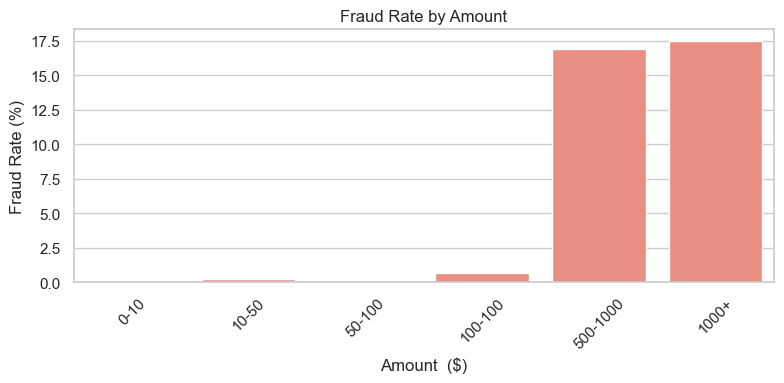

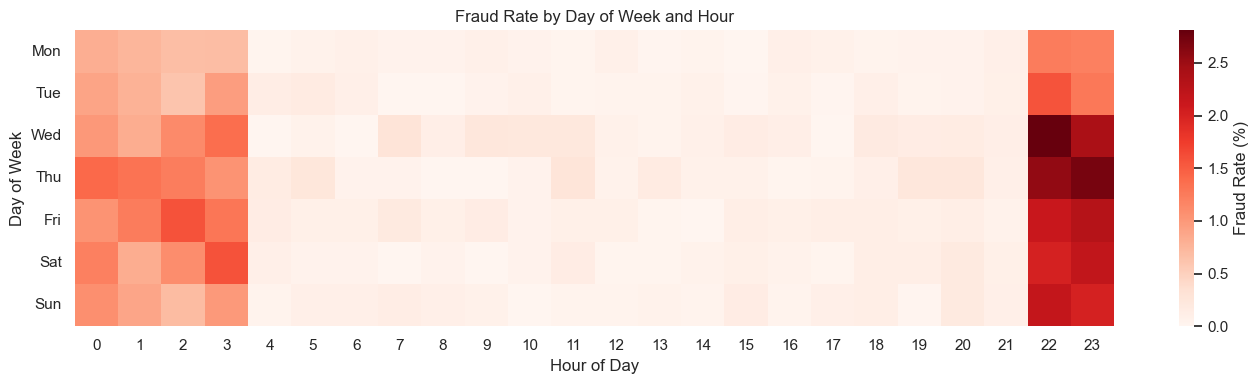

In [17]:
# Fraud rate by amount bucket
amt_cat = df['amt_category'].astype(str)
amt_order = list(pd.unique(amt_cat))
if hasattr(df['amt_category'], 'cat'):
    amt_order = [str(c) for c in df['amt_category'].cat.categories]
amt_fraud = df.groupby(amt_cat)['is_fraud'].mean().reindex(amt_order) * 100

plt.figure(figsize=(8, 4))
sns.barplot(x=amt_fraud.index, y=amt_fraud.values, color='salmon')
plt.title('Fraud Rate by Amount')
plt.xlabel('Amount  ($)')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Fraud rate heatmap by day of week and hour
fraud_heat = df.pivot_table(values='is_fraud', index='day_of_week', columns='hour', aggfunc='mean') * 100
plt.figure(figsize=(14, 4))
sns.heatmap(fraud_heat, cmap='Reds', cbar_kws={'label': 'Fraud Rate (%)'})
plt.title('Fraud Rate by Day of Week and Hour')
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day')
plt.yticks(ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=0)
plt.tight_layout()
plt.show()


Correlation Analysis

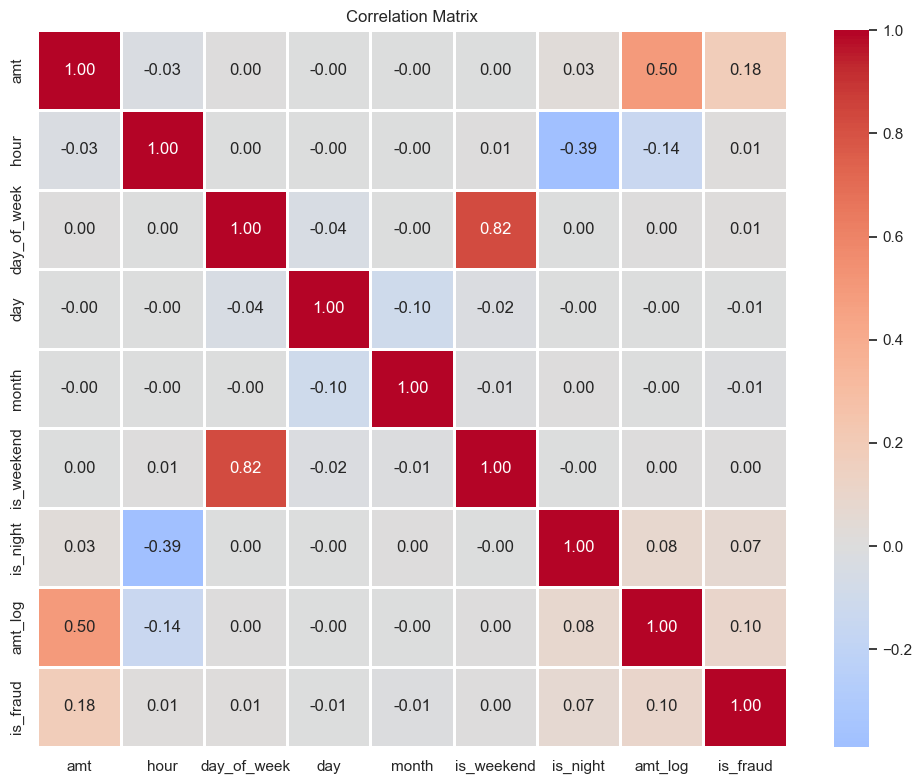


Correlation with is_fraud:
is_fraud       1.000000
amt            0.182267
amt_log        0.098374
is_night       0.070575
hour           0.011686
day_of_week    0.009365
is_weekend     0.002606
day           -0.009203
month         -0.011748
Name: is_fraud, dtype: float64


In [18]:
# Select numerical columns for correlation
numerical_cols = ['amt', 'hour', 'day_of_week', 'day', 'month', 'is_weekend', 'is_night', 'amt_log']
if len(numerical_cols) > 0:
    correlation_matrix = df[numerical_cols + ['is_fraud']].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                fmt='.2f', linewidths=1)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Check correlation with target
    print("\nCorrelation with is_fraud:")
    print(correlation_matrix['is_fraud'].sort_values(ascending=False))

Encoding

In [19]:
# Create a copy for encoded data
df_encoded = df.copy()

# Encoding function
def manual_label_encode(series):
    unique_vals = series.unique()
    mapping = {val: i for i, val in enumerate(unique_vals)}
    return series.map(mapping), mapping

In [20]:
categorical_cols = ['merchant', 'category', 'gender', 'state', 'job', 'amt_category']
encoding_mappings = {}

for col in categorical_cols:
    if col in df_encoded.columns:
        encoded_series, mapping = manual_label_encode(df_encoded[col].astype(str))
        df_encoded[col] = encoded_series
        encoding_mappings[col] = mapping
        print(f" Encoded '{col}' with {len(mapping)} unique values")

print(f"\nMapping for 'gender': {encoding_mappings.get('gender', {})}")
print(f"\nMapping for 'category': {encoding_mappings.get('category', {})}")
print(f"\nMapping for 'amt_category': {encoding_mappings.get('amt_category', {})}")
print(f"\nMapping for 'state': {encoding_mappings.get('state', {})}")
print(f"\nMapping for 'job': {encoding_mappings.get('job', {})}")
print(f"\nMapping for 'merchant': {encoding_mappings.get('merchant', {})}")

 Encoded 'merchant' with 693 unique values
 Encoded 'category' with 14 unique values
 Encoded 'gender' with 2 unique values
 Encoded 'state' with 50 unique values
 Encoded 'job' with 478 unique values
 Encoded 'amt_category' with 6 unique values

Mapping for 'gender': {'M': 0, 'F': 1}

Mapping for 'category': {'personal_care': 0, 'health_fitness': 1, 'misc_pos': 2, 'travel': 3, 'kids_pets': 4, 'shopping_pos': 5, 'food_dining': 6, 'home': 7, 'entertainment': 8, 'shopping_net': 9, 'misc_net': 10, 'grocery_pos': 11, 'gas_transport': 12, 'grocery_net': 13}

Mapping for 'amt_category': {'0-10': 0, '10-50': 1, '50-100': 2, '100-100': 3, '500-1000': 4, '1000+': 5}

Mapping for 'state': {'SC': 0, 'UT': 1, 'NY': 2, 'FL': 3, 'MI': 4, 'CA': 5, 'SD': 6, 'PA': 7, 'TX': 8, 'KY': 9, 'WY': 10, 'AL': 11, 'LA': 12, 'GA': 13, 'CO': 14, 'OH': 15, 'WI': 16, 'VT': 17, 'AR': 18, 'NJ': 19, 'IA': 20, 'MD': 21, 'MS': 22, 'KS': 23, 'IL': 24, 'MO': 25, 'ME': 26, 'TN': 27, 'DC': 28, 'AZ': 29, 'MT': 30, 'MN': 31, '

Feature Scaling (Standarization)

In [21]:
def manual_standard_scaling(series):
   
    mean = series.mean()
    std = series.std()
    if std == 0:  # Avoid division by zero
        return series
    return (series - mean) / std

# Scale numerical features
numerical_features = ['amt', 'hour', 'day_of_week', 'day', 'month', 'amt_log']
scaling_params = {}

for feature in numerical_features:
    if feature in df_encoded.columns:
        original_mean = df_encoded[feature].mean()
        original_std = df_encoded[feature].std()
        df_encoded[f'{feature}_scaled'] = manual_standard_scaling(df_encoded[feature])
        scaling_params[feature] = {'mean': original_mean, 'std': original_std}
        print(f" Scaled '{feature}' (mean: {original_mean:.2f}, std: {original_std:.2f})")

 Scaled 'amt' (mean: 69.39, std: 156.75)
 Scaled 'hour' (mean: 12.81, std: 6.81)
 Scaled 'day_of_week' (mean: 2.73, std: 2.18)
 Scaled 'day' (mean: 16.46, std: 8.96)
 Scaled 'month' (mean: 9.51, std: 1.98)
 Scaled 'amt_log' (mean: 3.53, std: 1.29)


Separate features and target

In [22]:
X = df_encoded.drop(columns=['is_fraud', 'trans_num', 'cc_num'] + 
                    [f'{col}_scaled' for col in numerical_features if f'{col}_scaled' in df_encoded.columns])
y = df_encoded['is_fraud']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (555719, 14)
Target shape: (555719,)


Saving Datas

In [23]:
# Save original processed data
df.to_csv('fraud_data_processed.csv', index=False)
print(" Processed data saved as 'fraud_data_processed.csv'")

# Save encoded data
df_encoded.to_csv('fraud_data_encoded.csv', index=False)
print("Encoded data saved as 'fraud_data_encoded.csv'")



 Processed data saved as 'fraud_data_processed.csv'
Encoded data saved as 'fraud_data_encoded.csv'


## Interpretation and Conclusions
- Fraud is rare relative to non-fraud, so class imbalance should be handled in any downstream modeling.
- Visualizations suggest fraud rates vary by transaction category, amount bucket, and time-of-day features.
- Feature engineering (time parts, amount transforms, encoded categories) makes the dataset more analysis-ready while preserving core signals.
